In [6]:
import pandas as pd
from mlflow import MlflowClient

from notebooks.analytics.utils import get_runs

In [7]:
EXP_NAME = "nsclust_mnist_fmnist_sliced-clusters"

In [8]:
client = MlflowClient(tracking_uri="http://antares.logti.etsmtl.ca:5000")
exp = client.get_experiment_by_name(EXP_NAME)
runs = get_runs(client, exp, 32)

In [12]:
data = list(map(lambda run: run.data.metrics | run.data.tags, runs))
df = pd.DataFrame(data=data)
df["round_id"] = df["round_id"].astype(float)
df.to_csv(f"{EXP_NAME}.csv")

<AxesSubplot: xlabel='round_id'>

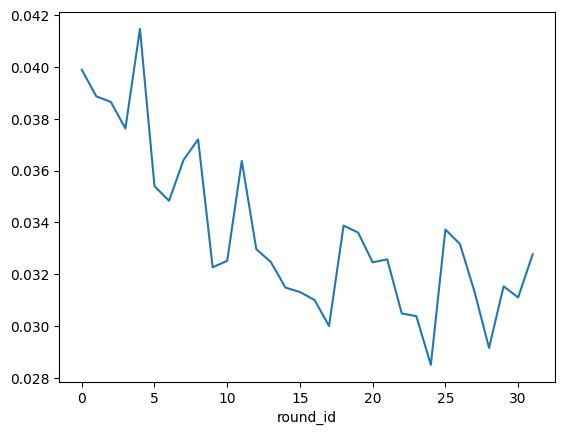

In [13]:
df.groupby("round_id")["validation_loss"].mean().plot()

<AxesSubplot: title={'center': 'training_loss'}, xlabel='round_id'>

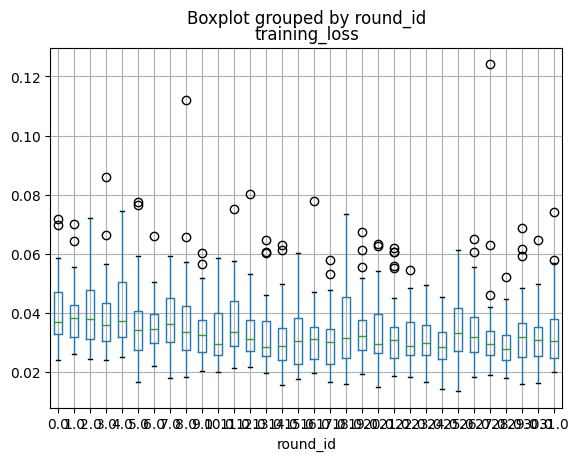

In [19]:
df.boxplot("training_loss", by="round_id")

<AxesSubplot: xlabel='round_id'>

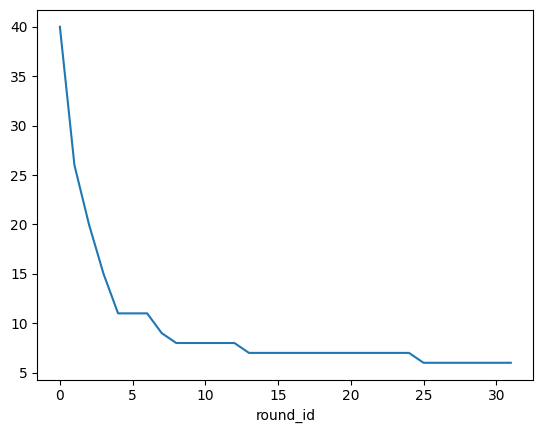

In [18]:
df.groupby("round_id")["cluster_id"].nunique().plot()